# Hw8

### 1,ISLP chapter 9 exercise #2

#### (a)

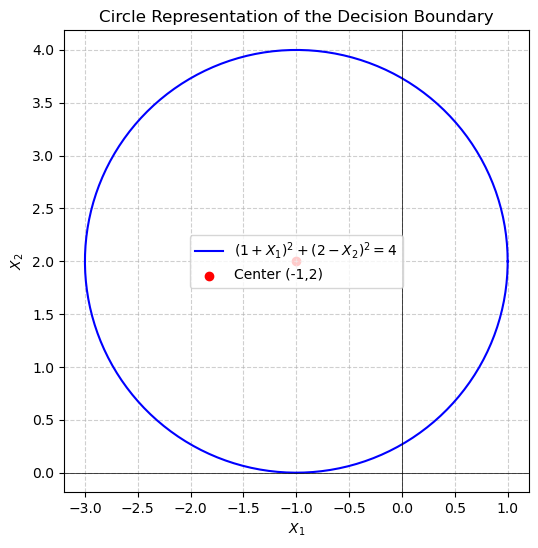

In [65]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, 2 * np.pi, 300)
circle_center_x, circle_center_y = -1, 2 
radius = 2  
x_circle = circle_center_x + radius * np.cos(theta)
y_circle = circle_center_y + radius * np.sin(theta) 
plt.figure(figsize=(6, 6))
plt.plot(x_circle, y_circle, label=r'$(1 + X_1)^2 + (2 - X_2)^2 = 4$', color='b')
plt.scatter(circle_center_x, circle_center_y, color='red', marker='o', label='Center (-1,2)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('Circle Representation of the Decision Boundary')
plt.legend()
plt.axis('equal')
plt.show()

#### (b)

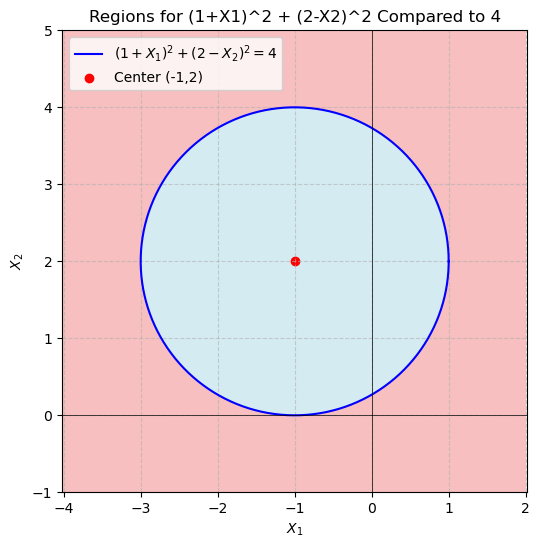

In [67]:
x_vals = np.linspace(-4, 2, 300)
y_vals = np.linspace(-1, 5, 300)
X, Y = np.meshgrid(x_vals, y_vals)
circle_region = (1 + X) ** 2 + (2 - Y) ** 2
plt.figure(figsize=(6, 6))
plt.contourf(X, Y, circle_region, levels=[0, 4], colors=['lightblue'], alpha=0.5) 
plt.contourf(X, Y, circle_region, levels=[4, 20], colors=['lightcoral'], alpha=0.5)  
plt.plot(x_circle, y_circle, color='b', label=r'$(1 + X_1)^2 + (2 - X_2)^2 = 4$')
plt.scatter(circle_center_x, circle_center_y, color='red', marker='o', label='Center (-1,2)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('Regions for (1+X1)^2 + (2-X2)^2 Compared to 4')
plt.legend()
plt.axis('equal')
plt.show()

#### (c)

Since it's a circle with centr (-1,2), r=2, we have: for (0,0): $\sqrt{(-1-0)^2+(2-0)^2}=\sqrt{5}>2$, blue

for (-1,1): $\sqrt{(-1-(-1))^2+(2-1)^2}=1<2$, red

for (2,2): $\sqrt{(-1-2)^2+(2-2)^2}=3>2$, blue

for (3,8): $\sqrt{(-1-3)^2+(2-8)^2}=\sqrt{52}>2$, blue

#### (d)

the boundary is: $(1+X_1)^2+(2-X_2)^2=4$, we have $1+2*X_1+(X_1)^2+4-4*X_2+(X_2)^2=4, 1+2*X_1+(X_1)^2-4*X_2+(X_2)^2=0$, we have it to be linear boundary.

### 2, ISLP chapter 9 exercise #3

#### (a)

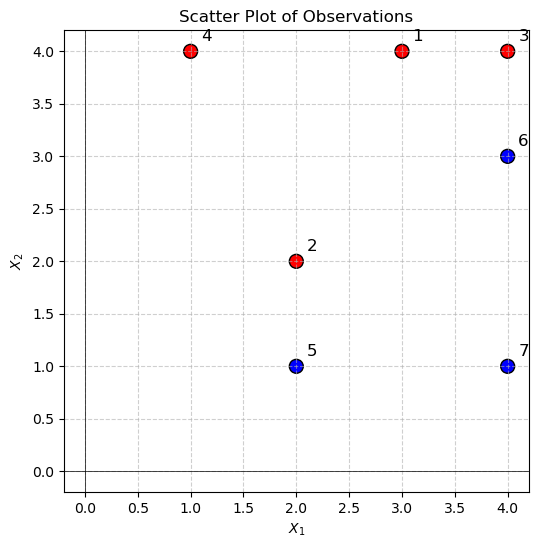

In [69]:
X1 = [3, 2, 4, 1, 2, 4, 4]
X2 = [4, 2, 4, 4, 1, 3, 1]
labels = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']
colors = ['red' if label == 'Red' else 'blue' for label in labels]
plt.figure(figsize=(6, 6))
plt.scatter(X1, X2, c=colors, s=100, edgecolors='black')
for i, (x, y) in enumerate(zip(X1, X2)):
    plt.text(x + 0.1, y + 0.1, str(i + 1), fontsize=12)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('Scatter Plot of Observations')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### (b)

 β₀ = 1.000, β₁ = -1.999, β₂ = 1.999


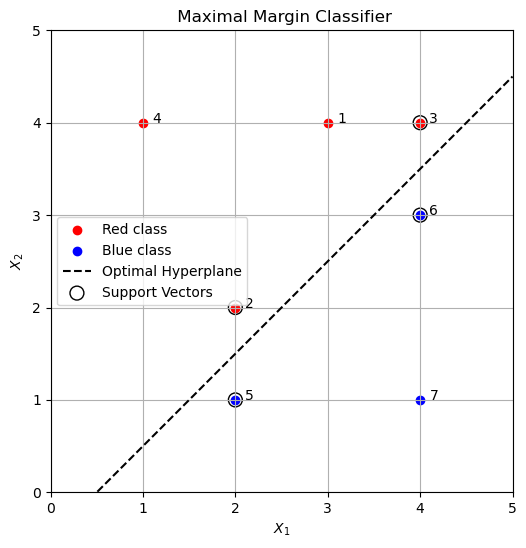

In [71]:
from sklearn.svm import SVC
X_red = [(3, 4), (2, 2), (4, 4), (1, 4)]
X_blue = [(2, 1), (4, 3), (4, 1)]
X = np.array(X_red + X_blue)
y = np.array([1]*len(X_red) + [-1]*len(X_blue)) 
all_points = X_red + X_blue
clf = SVC(kernel='linear', C=1e6)
clf.fit(X, y)
w = clf.coef_[0]
b = clf.intercept_[0]
print(f" β₀ = {b:.3f}, β₁ = {w[0]:.3f}, β₂ = {w[1]:.3f}")
x_vals = np.linspace(0, 5, 200)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*X_red), color='red', label='Red class')
plt.scatter(*zip(*X_blue), color='blue', label='Blue class')
plt.plot(x_vals, y_vals, 'k--', label='Optimal Hyperplane')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
for i, (x, y0) in enumerate(all_points, start=1):
    plt.text(x + 0.1, y0, f"{i}", fontsize=10)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title(' Maximal Margin Classifier')
plt.legend()
plt.grid(True)
plt.axis([0, 5, 0, 5])
plt.gca().set_aspect('equal')
plt.show()

the boundary is $-2*X_1+2*X_2+1=0$

#### (c)

Classify to Red if $-2*X_1+2*X_2+1>0$ and classify to Blue otherwise.

#### (d)

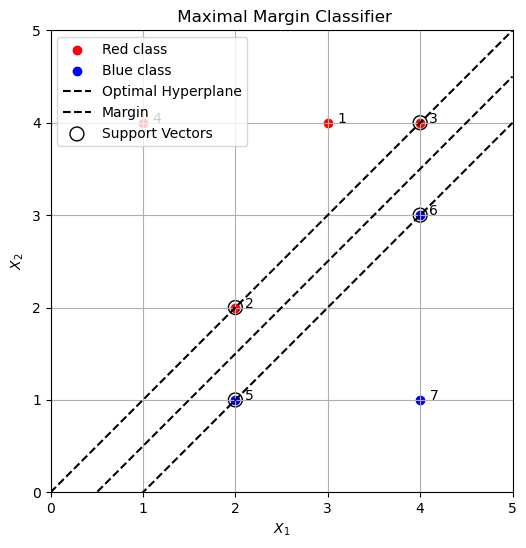

In [73]:
x1_vals = np.linspace(0, 5, 100)
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*X_red), color='red', label='Red class')
plt.scatter(*zip(*X_blue), color='blue', label='Blue class')
plt.plot(x_vals, y_vals, 'k--', label='Optimal Hyperplane')
margin_up   = -(b + w[0]*x1_vals - 1)/w[1]
margin_down = -(b + w[0]*x1_vals + 1)/w[1]
plt.plot(x1_vals, margin_up,   'k--', label="Margin")
plt.plot(x1_vals, margin_down, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
for i, (x, y0) in enumerate(all_points, start=1):
    plt.text(x + 0.1, y0, f"{i}", fontsize=10)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title(' Maximal Margin Classifier')
plt.legend()
plt.grid(True)
plt.axis([0, 5, 0, 5])
plt.gca().set_aspect('equal')
plt.show()

#### (e)

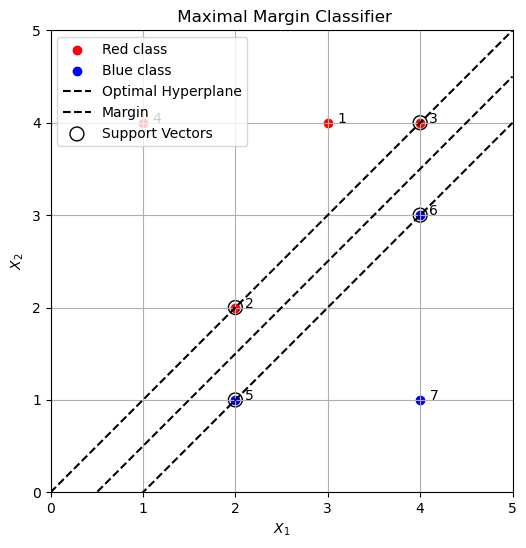

In [75]:
x1_vals = np.linspace(0, 5, 100)
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*X_red), color='red', label='Red class')
plt.scatter(*zip(*X_blue), color='blue', label='Blue class')
plt.plot(x_vals, y_vals, 'k--', label='Optimal Hyperplane')
margin_up   = -(b + w[0]*x1_vals - 1)/w[1]
margin_down = -(b + w[0]*x1_vals + 1)/w[1]
plt.plot(x1_vals, margin_up,   'k--', label="Margin")
plt.plot(x1_vals, margin_down, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
for i, (x, y0) in enumerate(all_points, start=1):
    plt.text(x + 0.1, y0, f"{i}", fontsize=10)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title(' Maximal Margin Classifier')
plt.legend()
plt.grid(True)
plt.axis([0, 5, 0, 5])
plt.gca().set_aspect('equal')
plt.show()

#### (f)

From the result it seems that the seventh point (4,1) has nothing to do with the decision boundary and margin, it's not a support vector and it's deep under the boundary line, so a slight move of it won't change the result. 

#### (g)

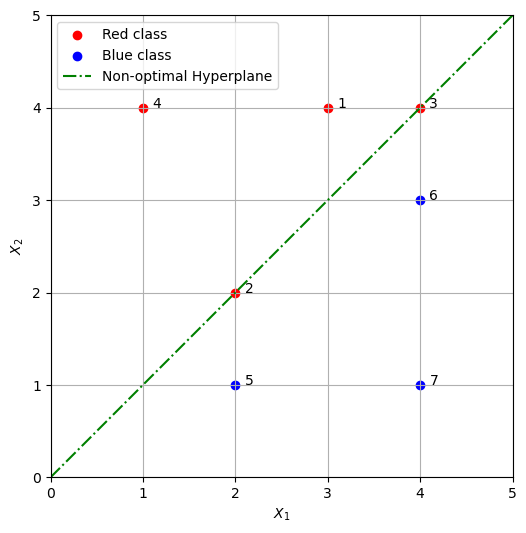

In [77]:
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*X_red), color='red', label='Red class')
plt.scatter(*zip(*X_blue), color='blue', label='Blue class')
for i, pt in enumerate(X_red + X_blue, start=1):
    plt.text(pt[0] + 0.1, pt[1], f'{i}', fontsize=10)
x_vals2 = np.linspace(0, 5, 100)
y_vals_non_optimal = x_vals2 
plt.plot(x_vals2, y_vals_non_optimal, 'g-.', label='Non-optimal Hyperplane')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.legend()
plt.axis([0, 5, 0, 5])
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

#### (h)

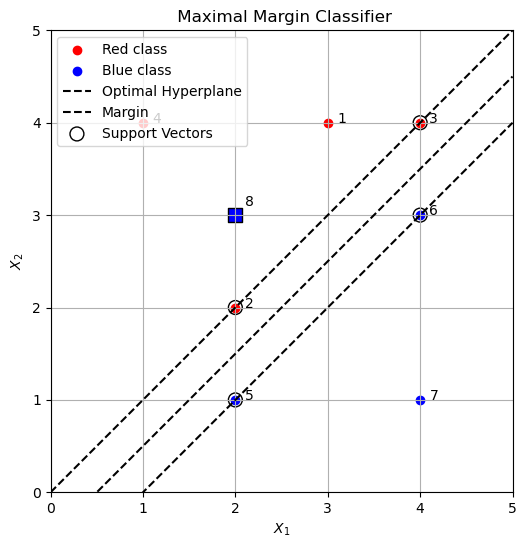

In [79]:
plt.figure(figsize=(6, 6))
plt.scatter(*zip(*X_red), color='red', label='Red class')
plt.scatter(*zip(*X_blue), color='blue', label='Blue class')
plt.plot(x_vals, y_vals, 'k--', label='Optimal Hyperplane')
margin_up   = -(b + w[0]*x1_vals - 1)/w[1]
margin_down = -(b + w[0]*x1_vals + 1)/w[1]
plt.plot(x1_vals, margin_up,   'k--', label="Margin")
plt.plot(x1_vals, margin_down, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.scatter(2, 3, c='blue', marker='s', edgecolors='black', s=100)
plt.text(2.1, 3.1, "8", fontsize=10)
for i, (x, y0) in enumerate(all_points, start=1):
    plt.text(x + 0.1, y0, f"{i}", fontsize=10)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title(' Maximal Margin Classifier')
plt.legend()
plt.grid(True)
plt.axis([0, 5, 0, 5])
plt.gca().set_aspect('equal')
plt.show()

### 3

#### (a)

C:\Users\DELL\AppData\Local\Temp\ipykernel_31840\2766942143.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, f_vals, levels=[0], colors='k', label=r'$f(X_1, X_2) = 0$')


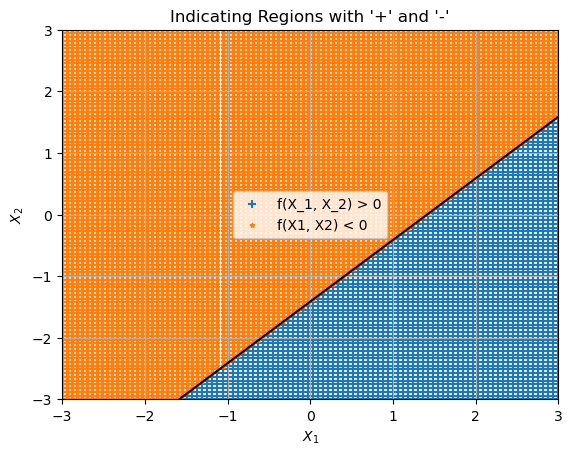

In [81]:
x1_vals = np.linspace(-3, 3, 100)
x2_vals = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
f_vals = (1 / np.sqrt(2)) * X1 - (1 / np.sqrt(2)) * X2 - 1
plt.contour(X1, X2, f_vals, levels=[0], colors='k', label=r'$f(X_1, X_2) = 0$')
plt.scatter(X1[f_vals > 0], X2[f_vals > 0], marker='+', label="f(X_1, X_2) > 0")
plt.scatter(X1[f_vals < 0], X2[f_vals < 0], marker="*", s=10, label="f(X1, X2) < 0")
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title("Indicating Regions with '+' and '-'")
plt.legend()
plt.grid(True)
plt.show()

#### (b)

C:\Users\DELL\AppData\Local\Temp\ipykernel_31840\3571385641.py:5: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, f_vals, levels=[0], colors='k', label=r'$f(X_1, X_2) = 0$')
C:\Users\DELL\AppData\Local\Temp\ipykernel_31840\3571385641.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, f_vals, levels=[np.sqrt(2)], colors='g', linestyles='dashed', label=r'$f(X_1, X_2) = +\sqrt{2}$')
C:\Users\DELL\AppData\Local\Temp\ipykernel_31840\3571385641.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X1, X2, f_vals, levels=[-np.sqrt(2)], colors='r', linestyles='dashed', label=r'$f(X_1, X_2) = -\sqrt{2}$')


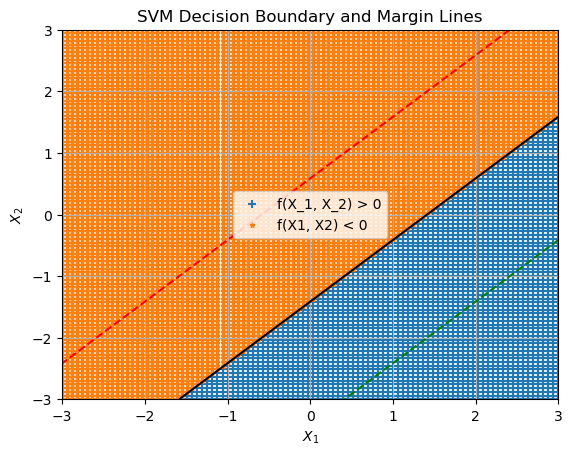

In [83]:
x1_vals = np.linspace(-3, 3, 100)
x2_vals = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
f_vals = (1 / np.sqrt(2)) * X1 - (1 / np.sqrt(2)) * X2 - 1
plt.contour(X1, X2, f_vals, levels=[0], colors='k', label=r'$f(X_1, X_2) = 0$')
plt.scatter(X1[f_vals > 0], X2[f_vals > 0], marker='+', label="f(X_1, X_2) > 0")
plt.scatter(X1[f_vals < 0], X2[f_vals < 0], marker="*", s=10, label="f(X1, X2) < 0")
plt.contour(X1, X2, f_vals, levels=[np.sqrt(2)], colors='g', linestyles='dashed', label=r'$f(X_1, X_2) = +\sqrt{2}$')
plt.contour(X1, X2, f_vals, levels=[-np.sqrt(2)], colors='r', linestyles='dashed', label=r'$f(X_1, X_2) = -\sqrt{2}$')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title("SVM Decision Boundary and Margin Lines")
plt.legend()
plt.grid(True)
plt.show()

#### (c)

(1,4): $\frac{1}{\sqrt{2}}*1-\frac{1}{\sqrt{2}}*4-1<0$, "-"

(1,1): $\frac{1}{\sqrt{2}}*1-\frac{1}{\sqrt{2}}*1-1<0$, "-"

(2,-5): $\frac{1}{\sqrt{2}}*2-\frac{1}{\sqrt{2}}*(-5)-1>0$, "+"

(2,-1): $\frac{1}{\sqrt{2}}*2-\frac{1}{\sqrt{2}}*(-1)-1>0$, "+"

(4,2): $\frac{1}{\sqrt{2}}*4-\frac{1}{\sqrt{2}}*2-1>0$, "+"

#### (d)

$\xi_1=max(0,1-(-1)(\frac{1}{\sqrt{2}}*1-\frac{1}{\sqrt{2}}*4-1))=0$

$\xi_2=max(0,1-(-1)(\frac{1}{\sqrt{2}}*1-\frac{1}{\sqrt{2}}*1-1))=0$

$\xi_3=max(0,1-(\frac{1}{\sqrt{2}}*2-\frac{1}{\sqrt{2}}*(-5)-1))=0$

$\xi_4=max(0,1-(\frac{1}{\sqrt{2}}*2-\frac{1}{\sqrt{2}}*(-1)-1))=0$

$\xi_5=max(0,1-(-1)(\frac{1}{\sqrt{2}}*4-\frac{1}{\sqrt{2}}*2-1))=\sqrt{2}$

### 4

#### (a)

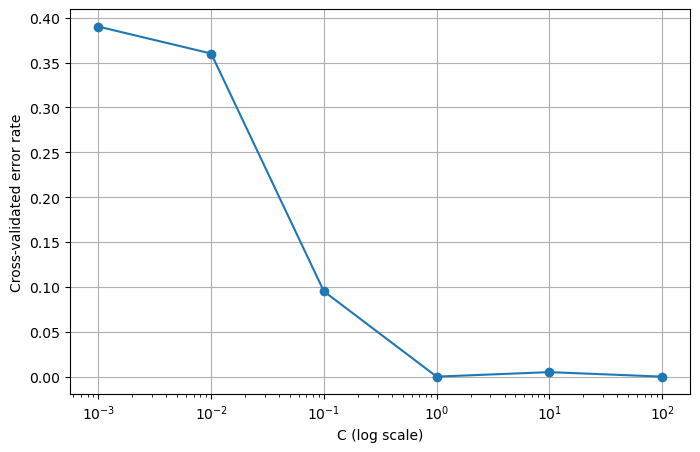

In [85]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
crab=pd.read_csv("C:\\Users\\DELL\\Downloads\\crabs.csv")
X=crab[["FL","RW","CL","CW","BD"]]
y=crab[["sp"]].values.ravel()
C_values = [0.001,0.01, 0.1, 1, 10, 100]
error_rates = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
for C in C_values:
    model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=C, random_state=1))
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy') 
    error = 1 - scores.mean()
    error_rates.append(error)
plt.figure(figsize=(8, 5))
plt.plot(C_values, error_rates, marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validated error rate')
plt.grid(True)
plt.show()

#### (b)

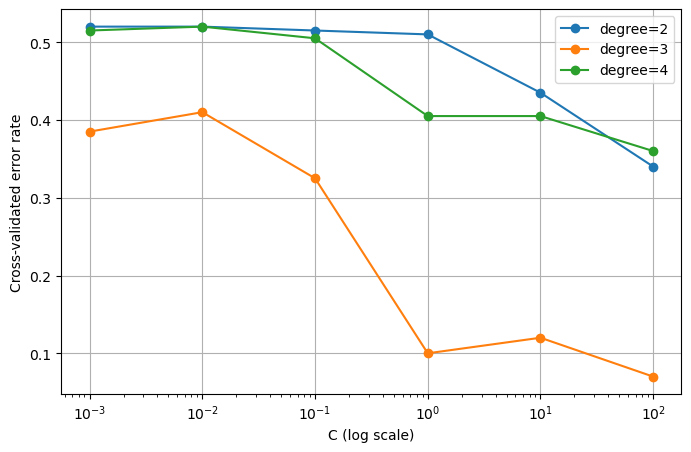

In [87]:
degrees = [2, 3, 4]
C_values = [0.001,0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(8, 5))
for d in degrees:
    errors = []
    for C in C_values:
        model = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=d, C=C, random_state=1))
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        error = 1 - scores.mean()
        errors.append(error)
    plt.plot(C_values, errors, marker='o', label=f'degree={d}')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validated error rate')
plt.legend()
plt.grid(True)
plt.show()

#### (c)

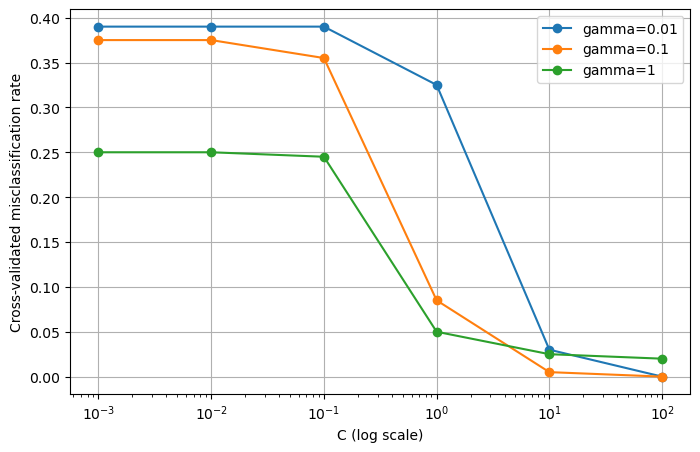

In [89]:
gammas = [0.01, 0.1, 1]
plt.figure(figsize=(8, 5))
for gamma in gammas:
    errors = []
    for C in C_values:
        model = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=gamma, C=C, random_state=1))
        scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        error = 1 - scores.mean()
        errors.append(error)
    plt.plot(C_values, errors, marker='o', label=f'gamma={gamma}')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validated misclassification rate')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
!jupyter nbconvert --to html stats_503_hw8.ipynb

[NbConvertApp] Converting notebook stats_503_hw8.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1010894 bytes to stats_503_hw8.html
